In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare

from collections import Counter
from utils import *

In [2]:
tools=["optitype",'T1K','hlahd','hisat',"arcas",'rna2hla',"seq2hla","hlaforest","phlat","hlavbseq",'hlaminer']
my_order=["Optitype","T1K","HLA-HD","HISAT","arcasHLA","RNA2HLA","seq2HLA","HLAforest","PHLAT","HLA-vbseq",'HLAminer']

In [3]:
europe_df, yoruba_df = split_csv_by_ancestry()

# lists to hold results
yoruba_missed_alleles = []
yoruba_total_alleles = []
europe_missed_alleles = []
europe_total_alleles = []



for t in tools:
    
    pre=pd.read_csv("../results/standard/"+str(t)+"_d1.csv")

    europe_inaccurate,europe_all = get_miscalled_and_all_alleles(pre,europe_df)
    yoruba_inaccurate,yoruba_all = get_miscalled_and_all_alleles(pre,yoruba_df)

    
    yoruba_missed_alleles.extend(yoruba_inaccurate)
    yoruba_total_alleles.extend(yoruba_all)
    europe_missed_alleles.extend(europe_inaccurate)
    europe_total_alleles.extend(europe_all)
    

In [4]:
y_missed = Counter(yoruba_missed_alleles)
y_all = Counter(yoruba_total_alleles)

df_y = []
for k in y_all.keys():
    try:
        df_y.append([k,y_all[k],y_missed[k], (y_missed[k]/y_all[k])])
    except:
        df_y.append([k,y_all[k],0,0])
        
df_y = pd.DataFrame(df_y,columns=['allele','all','missed','percentage'])
df_y = df_y.sort_values(by=['percentage'],ascending=False)
#df_y = df_y.drop(index=[3]) # drop error
df_y = df_y[df_y.percentage != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
df_y

,allele,all,missed,percentage
88,DQB1*06:04,22,8,0.363636
39,DQB1*06:02,121,36,0.297521
31,DQB1*06:03,132,39,0.295455
47,A*24:24,22,6,0.272727
50,DRB1*08:04,110,30,0.272727
...,...,...,...,...
71,B*15:03,44,3,0.068182
67,A*68:01,44,3,0.068182
81,A*33:01,22,1,0.045455
53,C*15:05,22,1,0.045455


In [5]:
e_missed = Counter(europe_missed_alleles)
e_all = Counter(europe_total_alleles)

df_e = []
for k in e_all.keys():
    try:
        df_e.append([k,e_all[k],e_missed[k], (e_missed[k]/e_all[k])])
    except:
        df_e.append([k,e_all[k],0,0])
        
df_e = pd.DataFrame(df_e,columns=['allele','all','missed','percentage'])
df_e = df_e.sort_values(by=['percentage'],ascending=False)
df_e = df_e.drop(index=[118]) # drop top row, it holds na values
df_e = df_e[df_e.percentage != 0] # drop all zeros... comment out if you want to keep completely accurate alleles in plot
df_e



,allele,all,missed,percentage
98,B*67:01,11,4,0.363636
137,DQB1*05:04,22,7,0.318182
131,DRB1*15:02,22,7,0.318182
140,DRB1*13:21,11,3,0.272727
81,DRB1*13:05,11,3,0.272727
...,...,...,...,...
123,C*03:02,33,2,0.060606
100,C*17:01,66,4,0.060606
96,C*14:02,154,9,0.058442
138,B*35:08,22,1,0.045455


([<matplotlib.axis.XTick at 0x7face065c550>,
 [Text(1, 0, 'yoruba'), Text(2, 0, 'europe')])

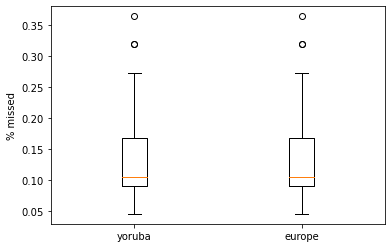

In [6]:
# box plot of overall percentage missed (completely null results lol)
yoruba = df_y['percentage']
europe = yoruba = df_e['percentage']

plt.boxplot([yoruba,europe])
plt.ylabel('% missed')
plt.xticks([1,2],['yoruba','europe'])

In [7]:
# add locus column to dataframes


e_loci = [get_locus(allele) for allele in df_e["allele"]]
df_e.insert(1, "Locus", e_loci, True)
print(df_e)

y_loci = [get_locus(allele) for allele in df_y["allele"]]
df_y.insert(1, "Locus", y_loci, True)
print(df_y)

         allele Locus  all  missed  percentage
98      B*67:01     B   11       4    0.363636
137  DQB1*05:04  DQB1   22       7    0.318182
131  DRB1*15:02  DRB1   22       7    0.318182
140  DRB1*13:21  DRB1   11       3    0.272727
81   DRB1*13:05  DRB1   11       3    0.272727
..          ...   ...  ...     ...         ...
123     C*03:02     C   33       2    0.060606
100     C*17:01     C   66       4    0.060606
96      C*14:02     C  154       9    0.058442
138     B*35:08     B   22       1    0.045455
76      B*15:10     B   22       1    0.045455

[143 rows x 5 columns]
        allele Locus  all  missed  percentage
88  DQB1*06:04  DQB1   22       8    0.363636
39  DQB1*06:02  DQB1  121      36    0.297521
31  DQB1*06:03  DQB1  132      39    0.295455
47     A*24:24     A   22       6    0.272727
50  DRB1*08:04  DRB1  110      30    0.272727
..         ...   ...  ...     ...         ...
71     B*15:03     B   44       3    0.068182
67     A*68:01     A   44       3    0.06818

Text(0, 0.5, 'Percentage of miscalls')

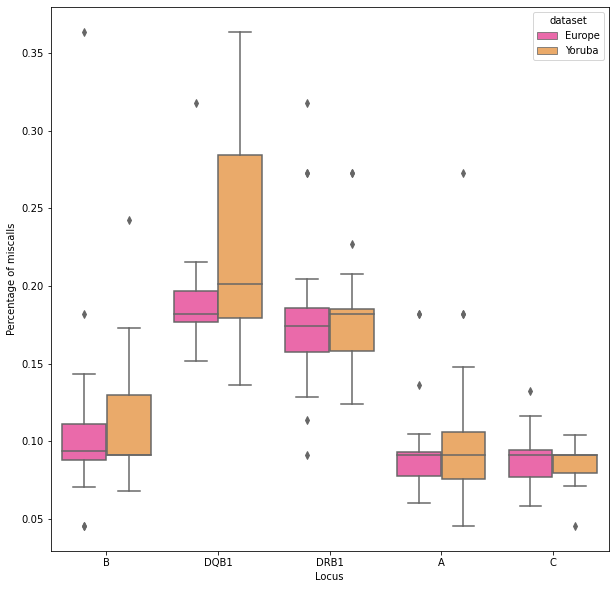

In [8]:
# null again lol
plt.figure(figsize=(10,10))

df_e['dataset'] = 'Europe'
df_y['dataset'] = 'Yoruba'
sns.boxplot(data=pd.concat([df_e, df_y]), x='Locus', y='percentage', hue='dataset', palette='spring')

plt.ylabel("Percentage of miscalls")

Text(0, 0.5, '% miscall for Yoruba')

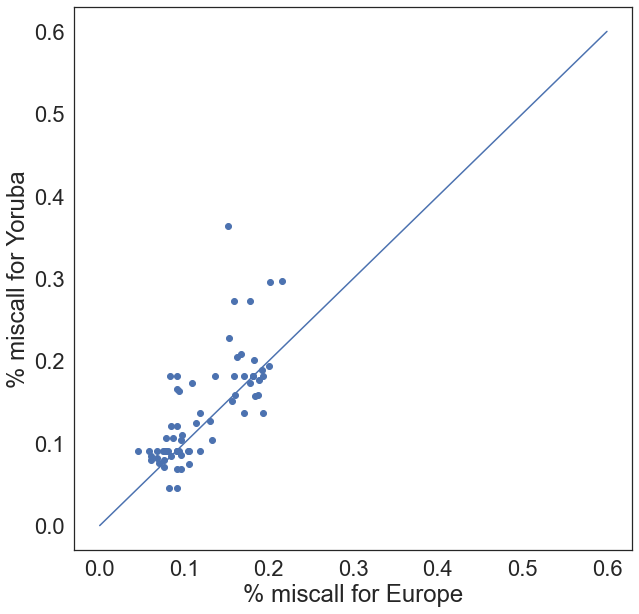

In [24]:
plt.figure(figsize=(10,10))

sns.set_context("paper")
sns.color_palette("pastel")

sns.set(font_scale=2)
sns.set_style("white")

df = pd.merge(df_y, df_e, on='allele')

plt.scatter(df['percentage_y'],df['percentage_x'])
plt.plot(np.linspace(0, 0.6, 100),np.linspace(0, 0.6, 100))
plt.xlabel('% miscall for Europe')
plt.ylabel('% miscall for Yoruba')

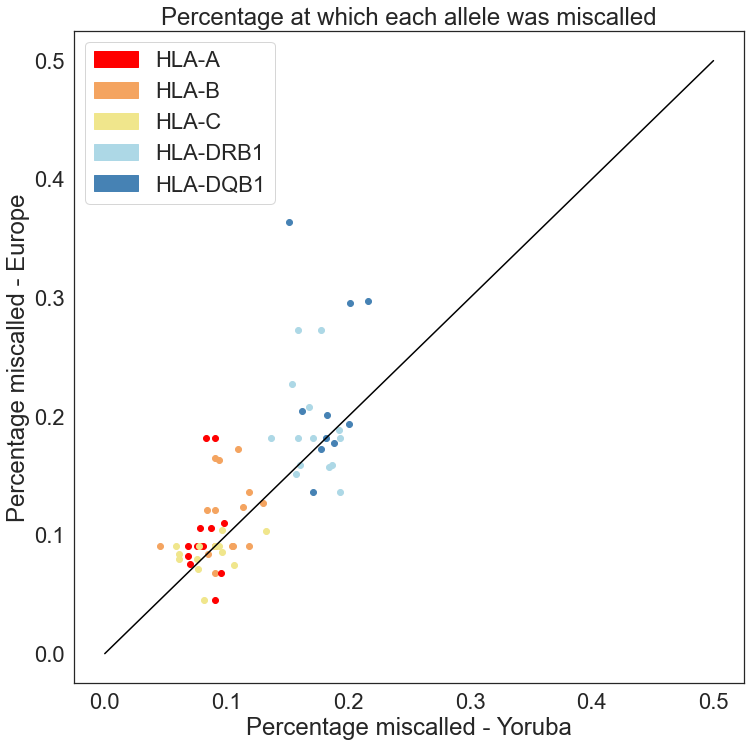

In [25]:
plt.figure(figsize=(12,12))
plt.plot(np.linspace(0, 0.5, 100),np.linspace(0, 0.5, 100),color='black')


sns.set_context("paper")
sns.color_palette("pastel")

sns.set(font_scale=2)
sns.set_style("white")


# IN THE DATAFRAME, pd.merge automatically labeled tge percentages x and y. x = yoruba, y = europe
alleles = np.array(df['allele'])
color = []

# determine what color for each bar
for a in alleles:
    if (a[0]=='A'):
        color.append('red')
    if (a[0]=='B'):
        color.append('sandybrown')
    if (a[0]=='C'):
        color.append('khaki')
    if (a[0:2]=='DR'):
        color.append('lightblue')
    if (a[0:2]=='DQ'):
        color.append('steelblue')

y = list(df['percentage_y'])
x = list(df['percentage_x'])
for i in range(len(y)):
    plt.scatter(y[i],x[i],color=color[i])
    

colors = {'HLA-A':'red', 'HLA-B':'sandybrown','HLA-C': 'khaki','HLA-DRB1':'lightblue','HLA-DQB1':'steelblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.xlabel('Percentage miscalled - Yoruba')
plt.ylabel('Percentage miscalled - Europe')
plt.title('Percentage at which each allele was miscalled')

plt.legend(handles, labels)